In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import missingno as mno

In [2]:
df = pd.read_csv("raw_data/bank_train.csv")

In [3]:
df.head()

,id,age,job,marital,education,location,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,41.0,management,single,tertiary,NaN,no,4522.0,no,no,cellular,28,aug,55,1.0,-1,0.0,unknown,no
1,1,42.0,blue-collar,married,primary,NaN,yes,398.0,yes,n,unknown,16,may,251,4.0,-1,0.0,unknown,no
2,2,26.0,student,single,secondary,Lisboa,no,706.0,no,no,unknown,8,oct,118,1.0,105,2.0,other,no
3,3,54.0,management,married,tertiary,NaN,no,0.0,no,y,cellular,19,nov,307,3.0,-1,0.0,unknown,no
4,4,43.0,self-employed,married,secondary,Porto,no,918.0,yes,no,unknown,6,may,193,1.0,-1,0.0,unknown,no


In [4]:
df.describe(include="all")

,id,age,job,marital,education,location,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,40000.00000,38801.000000,38651,39903,40000,18498,40000,38208.000000,40000,40000,39266,40000.000000,40000,40000.000000,38603.000000,40000.000000,39703.000000,40000,40000
unique,NaN,NaN,13,3,4,6,2,NaN,2,4,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,NaN,blue-collar,married,secondary,Lisboa,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,NaN,8313,24009,20563,9261,39268,NaN,22213,23551,25447,NaN,12200,NaN,NaN,NaN,NaN,32662,35322
mean,19999.50000,40.962475,NaN,NaN,NaN,NaN,NaN,1364.645545,NaN,NaN,NaN,15.820250,NaN,380.420875,2.752040,40.363700,0.584994,NaN,NaN
std,11547.14972,11.029089,NaN,NaN,NaN,NaN,NaN,3059.020764,NaN,NaN,NaN,8.328291,NaN,3044.410537,3.042173,100.294987,2.342661,NaN,NaN
min,0.00000,8.000000,NaN,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,-20.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,9999.75000,33.000000,NaN,NaN,NaN,NaN,NaN,73.000000,NaN,NaN,NaN,8.000000,NaN,102.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,19999.50000,39.000000,NaN,NaN,NaN,NaN,NaN,450.500000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,29999.25000,48.000000,NaN,NaN,NaN,NaN,NaN,1423.000000,NaN,NaN,NaN,21.000000,NaN,320.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [5]:
df = df.drop(columns = ["id"])

In [6]:
for column in df.columns:
    print("coluna:", column)
    print(f"{df[column].unique()}, {df[column].dtype}")

coluna: age
[ 41.  42.  26.  54.  43.  34.  40.  45.  51.  21.  32.  60.  47.  46.
  31.  53.  27.  29.  35.  36.  nan  25.  37.  50.  77.  57.  30.  58.
  33.  44.  48.  55.  61.  84.  28.  39.  63.  59.  38.  70.  56.  65.
  49.  22.  71.  52.  74.  23.  24.  64.  19.  78.  62.  73.  69.  67.
  66.  80.  68.  86.   8. 150.  72.  76.  83.  75.  20.  85.  82.  79.
  87.  81.  18.  95.  88.  89.  90.  92.  94.  93.], float64
coluna: job
['management' 'blue-collar' 'student' 'self-employed' 'technician'
 'administrator' 'retired' 'housemaid' 'services' 'unemployed' nan
 'admin.' 'unknown' 'entrepreneur'], object
coluna: marital
['single' 'married' 'divorced' nan], object
coluna: education
['tertiary' 'primary' 'secondary' 'unknown'], object
coluna: location
[nan 'Lisboa' 'Porto' 'Amadora' 'Braga' 'Coimbra' 'Faro'], object
coluna: default
['no' 'yes'], object
coluna: balance
[ 4522.   398.   706. ...  4820. 13851.  4889.], float64
coluna: housing
['no' 'yes'], object
coluna: loan
['no' 'n

In [7]:
df.replace({"y": "yes", "n": "no"}, inplace=True)

<Axes: >

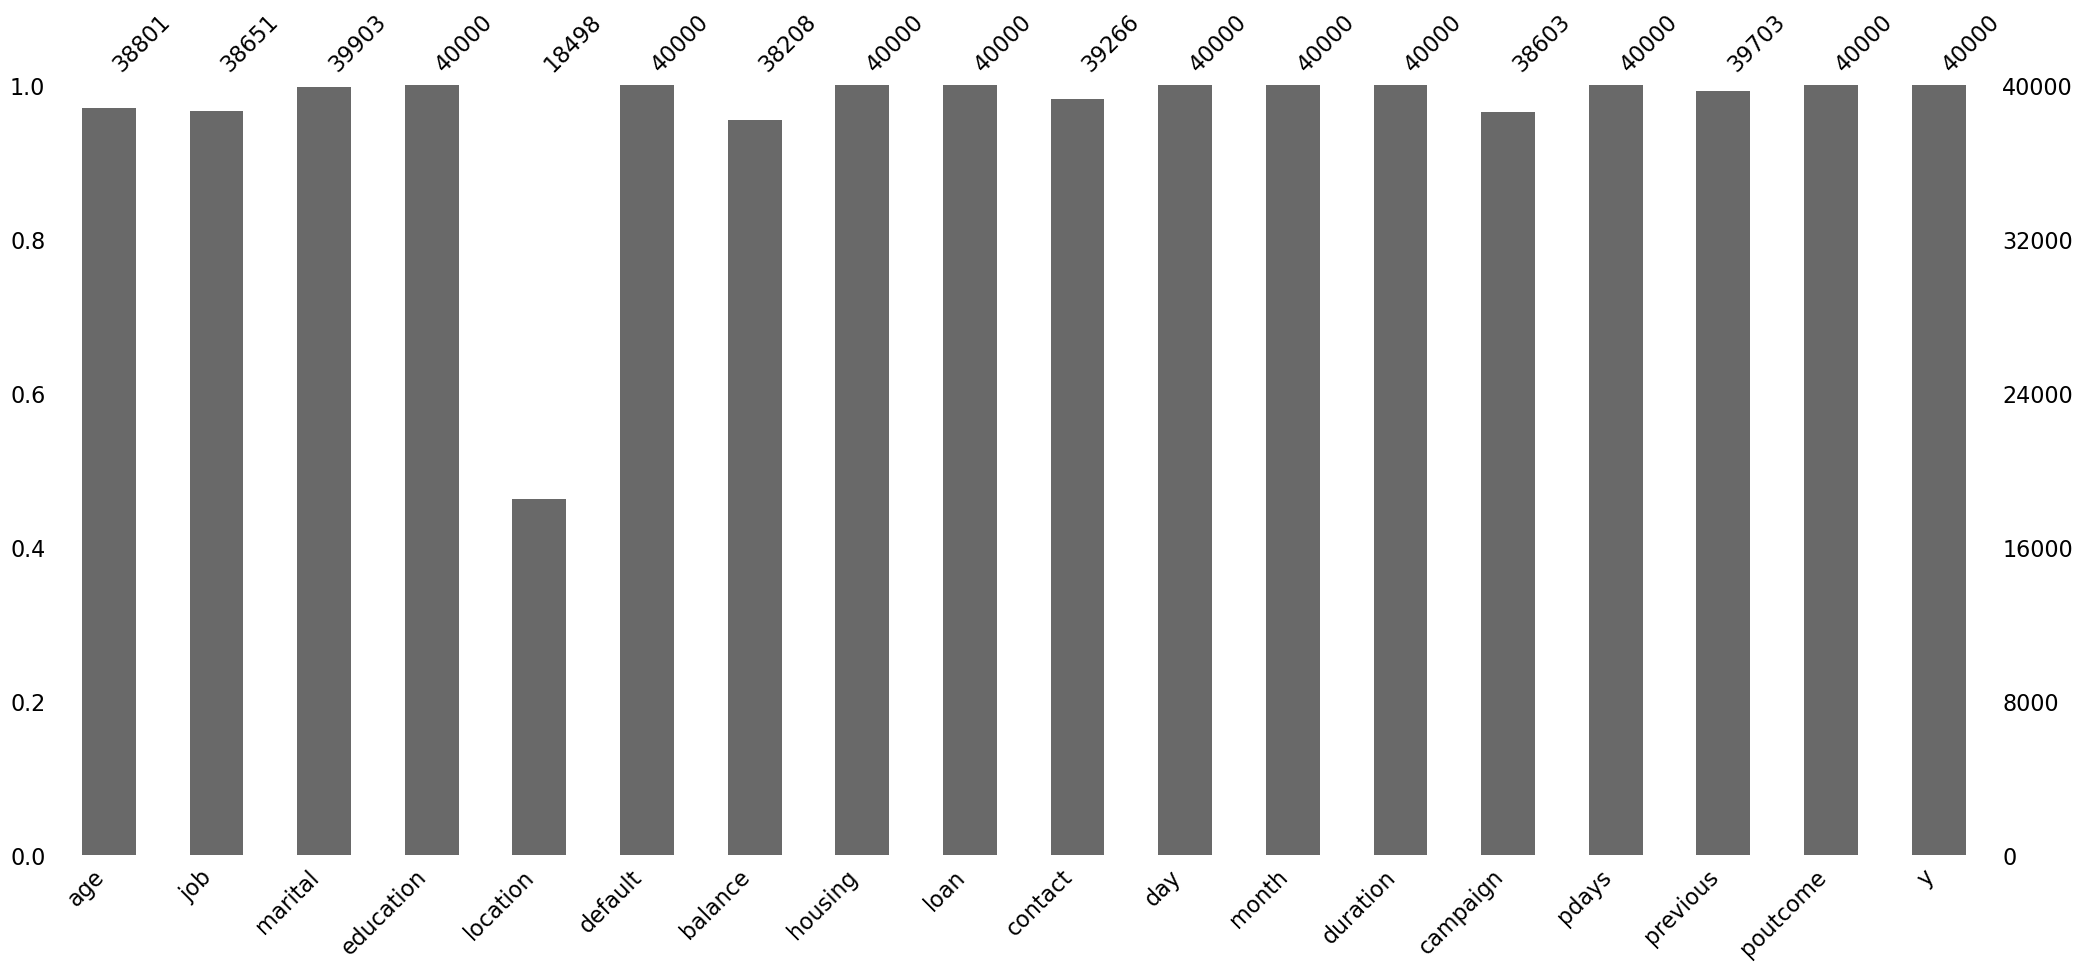

In [8]:
mno.bar(df)

In [9]:
df = df.drop(columns = ["location"])

In [10]:
df["age"] = df["age"].fillna(np.int64(df["age"].mean()))
df["age"] = df["age"].astype(np.int64)
df["campaign"] = df["campaign"].fillna(np.int64(df["campaign"].mean()))
df["previous"] = df["previous"].fillna(np.int64(df["previous"].mean()))
df["campaign"] = df["campaign"].astype(np.int64)
df["previous"] = df["previous"].astype(np.int64)
for column in df.columns:
    if df[column].dtype != "object":
        if df[column].dtype == "int64":
            df[column] = df[column].fillna(np.int64(df[column].mean()))
        else:
            df[column] = df[column].fillna(df[column].mean())
    else:
        df[column] = df[column].fillna(df[column].mode())

<Axes: >

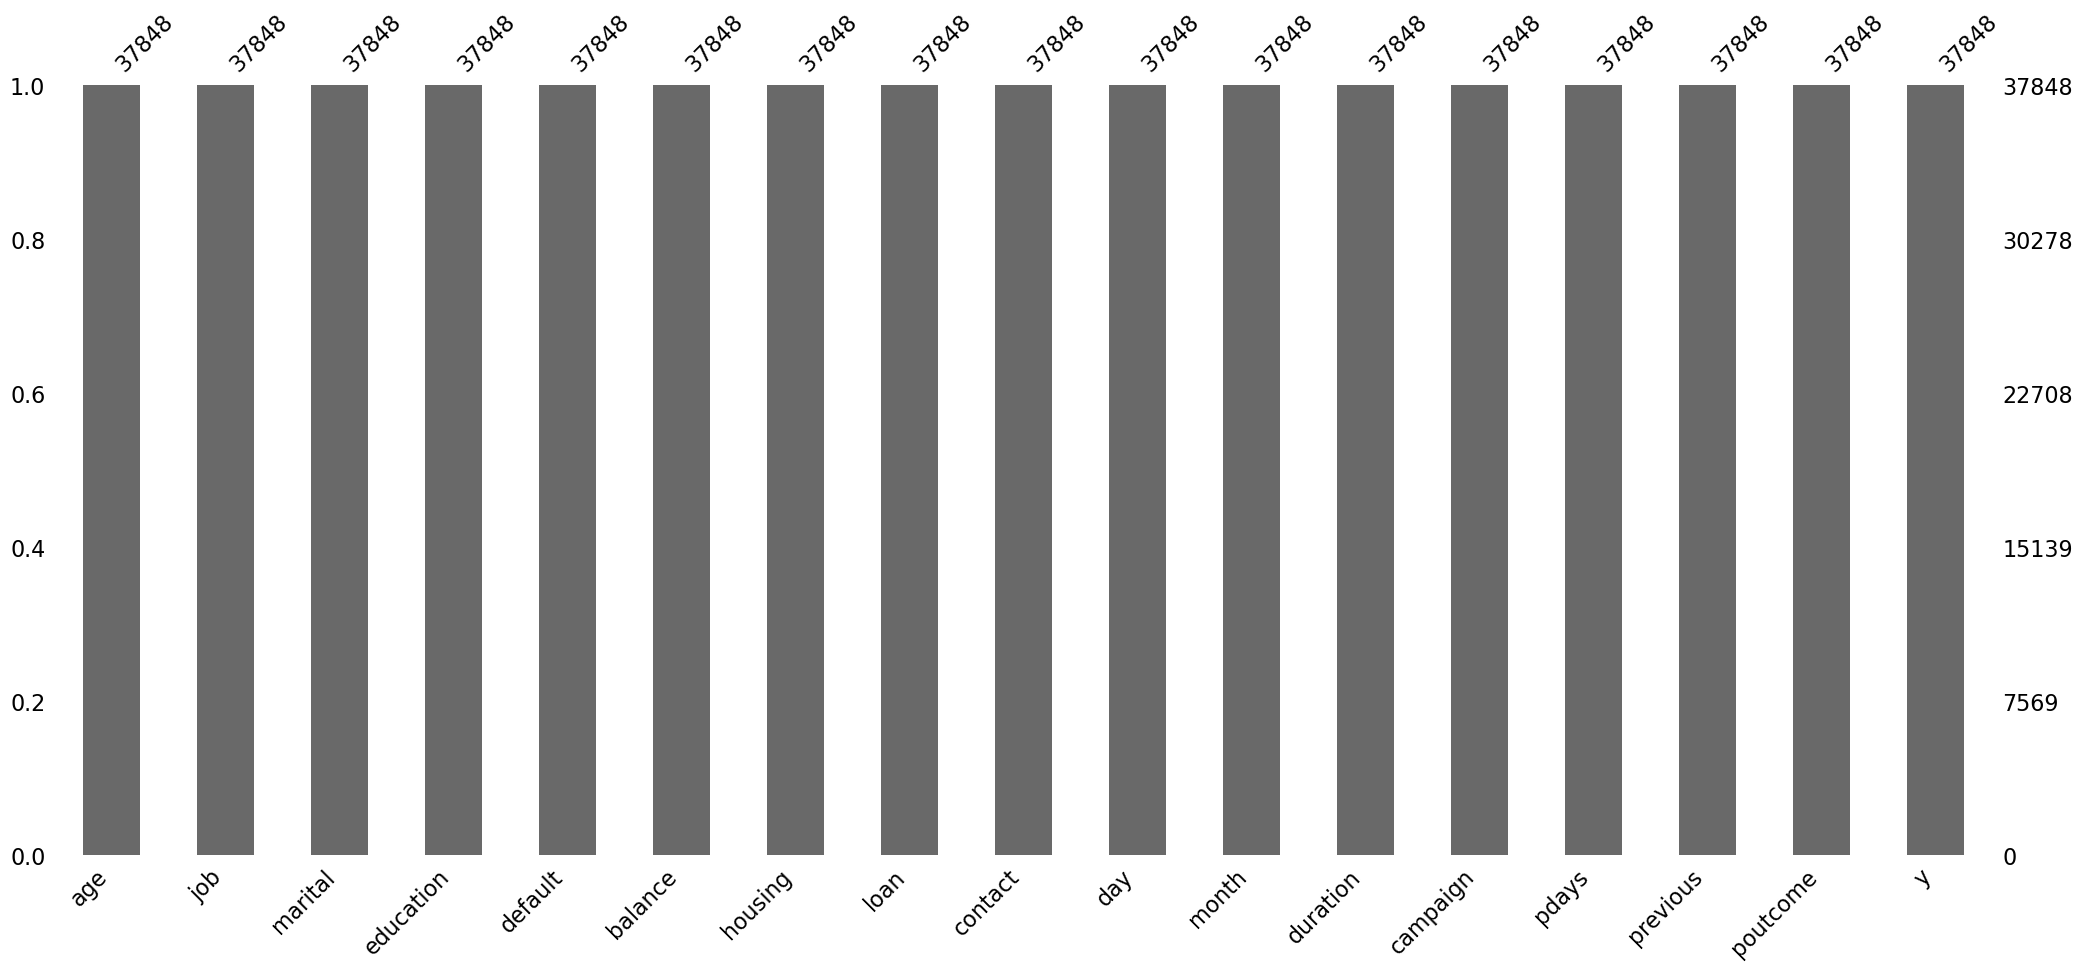

In [11]:
df.dropna(inplace=True)
mno.bar(df)

In [12]:
df.replace({"admin.": "administrator"}, inplace=True)
for column in df.columns:
    print(column, df[column].unique(), df[column].dtype)


age [ 41  42  26  54  43  34  40  45  51  32  60  47  46  31  53  27  29  35
  36  25  37  50  57  30  58  33  44  48  61  84  28  39  63  59  38  70
  56  65  49  55  21  22  71  52  74  23  24  64  19  78  62  77  69  66
  80  68  86   8 150  72  76  67  83  75  20  85  82  73  79  87  81  18
  95  88  89  90  92  94  93] int64
job ['management' 'blue-collar' 'student' 'self-employed' 'technician'
 'retired' 'housemaid' 'services' 'unemployed' 'administrator' 'unknown'
 'entrepreneur'] object
marital ['single' 'married' 'divorced'] object
education ['tertiary' 'primary' 'secondary' 'unknown'] object
default ['no' 'yes'] object
balance [ 4522.   398.   706. ...  4820. 13851.  4889.] float64
housing ['no' 'yes'] object
loan ['no' 'yes'] object
contact ['cellular' 'unknown' 'telephone'] object
day [28 16  8 19  6 13 31 14  7 18  4 26  3 21  9 20 30  5  2 29 23 17 15 11
 10 27  1 12 24 25 22] int64
month ['aug' 'may' 'oct' 'nov' 'jul' 'jun' 'apr' 'jan' 'feb' 'sep' 'mar' 'dec'] object
dur

In [21]:
from sklearn.preprocessing import LabelEncoder
for column in df.columns:
    if df[column].dtype == "object":
        le = LabelEncoder()
        le.fit(df[column].unique())
        df[column] = le.transform(df[column])
        print(df[column].unique(), le.inverse_transform((df[column])))
    print(df[column].unique(), df[column].dtype)
df.to_csv("data_treated.csv", index=False)
    

[ 41  42  26  54  43  34  40  45  51  32  60  47  46  31  53  27  29  35
  36  25  37  50  57  30  58  33  44  48  61  84  28  39  63  59  38  70
  56  65  49  55  21  22  71  52  74  23  24  64  19  78  62  77  69  66
  80  68  86   8 150  72  76  67  83  75  20  85  82  73  79  87  81  18
  95  88  89  90  92  94  93] int64
[ 4  1  8  6  9  5  3  7 10  0 11  2] int64
[2 1 0] int64
[2 0 1 3] int64
[0 1] int64
[ 4522.   398.   706. ...  4820. 13851.  4889.] float64
[0 1] int64
[0 1] int64
[0 2 1] int64
[28 16  8 19  6 13 31 14  7 18  4 26  3 21  9 20 30  5  2 29 23 17 15 11
 10 27  1 12 24 25 22] int64
[ 1  8 10  9  5  6  0  4  3 11  7  2] int64
[  55  251  118 ... 1095 1388 1489] int64
[ 1  4  3  6  2  5 31 13 30  7 26  8 19 10 14  9 12 15 29 22 16 17 18 11
 24 28 33 36 21 20 25 23 32 27 35 43 55 41 37 38 39 34 50 58] int64
[ -1 105 322 259 100 166  92   5 348 314 349 273  97 149  91 462 150 123
 316 244 183 356 112 359 140 365 102 278 256 184 116 174 329 299  85 368
 337 193 127 332 

In [14]:
X = df[df.columns.drop("y")]
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,41,4,2,2,0,4522.0,0,0,0,28,1,55,1,-1,0,3
1,42,1,1,0,1,398.0,1,0,2,16,8,251,4,-1,0,3
2,26,8,2,1,0,706.0,0,0,2,8,10,118,1,105,2,1
3,54,4,1,2,0,0.0,0,1,0,19,9,307,3,-1,0,3
4,43,6,1,1,0,918.0,1,0,2,6,8,193,1,-1,0,3


In [15]:
Y = df["y"]
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

In [17]:
models = {"Random Forest": [], "Extra Trees": [], "Decision Tree": []}
for i in range(80, 100):
    models["Random Forest"].append(RandomForestClassifier(n_estimators=i, random_state=1234))
    models["Extra Trees"].append(ExtraTreesClassifier(n_estimators=i, random_state=1234))
models["Decision Tree"].append(DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=1234))

In [18]:
for model in models:
    for i in range(len(models[model])):
        models[model][i].fit(X_train, Y_train)

In [19]:
y_preds_models = {"Random Forest": [], "Extra Trees": [], "Decision Tree": []}
for model in models:
    for i in range(len(models[model])):
        y_preds_models[model].append(models[model][i].predict(X_test))


In [22]:
for model in y_preds_models:
    for y_pred in y_preds_models[model]:
        #print(classification_report(Y_test, y_pred))
        #print(confusion_matrix(Y_test, y_pred))
        print("\nModel", model, "\n\naccuracy:", accuracy_score(Y_test, y_pred), "\nRecall Score: ", recall_score(Y_test, y_pred), "\nPrecision Score: ", precision_score(Y_test, y_pred), "\nF1 Score: ", f1_score(Y_test, y_pred))


Model Random Forest 

accuracy: 0.9011008366358433 
Recall Score:  0.38692712246431255 
Precision Score:  0.6265206812652068 
F1 Score:  0.47840222944728283

Model Random Forest 

accuracy: 0.9015411712901805 
Recall Score:  0.3981968444778362 
Precision Score:  0.6257378984651711 
F1 Score:  0.4866850321395776

Model Random Forest 

accuracy: 0.9007485689123734 
Recall Score:  0.3854244928625094 
Precision Score:  0.6240875912408759 
F1 Score:  0.47654435671156525

Model Random Forest 

accuracy: 0.901629238221048 
Recall Score:  0.39969947407963935 
Precision Score:  0.6258823529411764 
F1 Score:  0.4878496102705181

Model Random Forest 

accuracy: 0.9012769704975782 
Recall Score:  0.3884297520661157 
Precision Score:  0.6274271844660194 
F1 Score:  0.47981438515081204

Model Random Forest 

accuracy: 0.9017173051519155 
Recall Score:  0.4004507888805409 
Precision Score:  0.6263219741480611 
F1 Score:  0.48854262144821264

Model Random Forest 

accuracy: 0.9015411712901805 
Recall

In [23]:
df_final = pd.read_csv("raw_data/bank_test.csv")
df_final.head()

,id,age,job,marital,education,location,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,40000,26.0,self-employed,single,tertiary,Porto,no,-101.0,no,yes,cellular,29,jan,172,1.0,-1,0.0,unknown
1,40001,47.0,technician,married,secondary,NaN,no,1167.0,yes,no,cellular,2,feb,139,3.0,73,2.0,success
2,40002,35.0,self-employed,married,tertiary,NaN,no,2427.0,no,no,cellular,12,jul,210,3.0,158,7.0,other
3,40003,54.0,technician,divorced,secondary,NaN,no,NaN,no,no,cellular,30,jan,86,1.0,-1,0.0,unknown
4,40004,27.0,blue-collar,single,secondary,Braga,no,-208.0,yes,n,unknown,21,may,127,2.0,-1,0.0,unknown


In [24]:
ids = df_final["id"]
display(ids)

0       40000
1       40001
2       40002
3       40003
4       40004
        ...  
5206    45206
5207    45207
5208    45208
5209    45209
5210    45210
Name: id, Length: 5211, dtype: int64

In [25]:
df_final.drop(columns=["id"], inplace=True)
df_final

,age,job,marital,education,location,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,26.0,self-employed,single,tertiary,Porto,no,-101.0,no,yes,cellular,29,jan,172,1.0,-1,0.0,unknown
1,47.0,technician,married,secondary,NaN,no,1167.0,yes,no,cellular,2,feb,139,3.0,73,2.0,success
2,35.0,self-employed,married,tertiary,NaN,no,2427.0,no,no,cellular,12,jul,210,3.0,158,7.0,other
3,54.0,technician,divorced,secondary,NaN,no,NaN,no,no,cellular,30,jan,86,1.0,-1,0.0,unknown
4,27.0,blue-collar,single,secondary,Braga,no,-208.0,yes,n,unknown,21,may,127,2.0,-1,0.0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5206,38.0,administrator,married,secondary,NaN,no,1767.0,yes,no,cellular,12,nov,893,7.0,-1,0.0,unknown
5207,39.0,housemaid,married,primary,Lisboa,no,562.0,no,no,cellular,12,aug,234,2.0,-1,0.0,unknown
5208,46.0,technician,married,secondary,Amadora,no,0.0,no,no,unknown,20,jun,625,1.0,-1,0.0,unknown
5209,NaN,technician,single,secondary,Braga,no,1195.0,yes,no,cellular,19,nov,187,6.0,188,9.0,failure


In [26]:
for column in df_final.columns:
    print("coluna:", column)
    print(f"{df_final[column].unique()}, {df_final[column].dtype}")

coluna: age
[ 26.  47.  35.  54.  27.  40.  nan  48.  33.  37.  61.  45.  32.  46.
  43.  31.  34.  53.  38.  60.  50.  59.  39.  19.  30.  49.  56.  51.
  44.  28.  25.  36.  52.  65.  29.  78.  41.  58.  42.  57.  23.  55.
  24.  73.  80.  62.  67.  82.  71. 150.  70.  63.  74.  64.  66.  72.
  22.  83.  76.  68.  77.  69.  81.  21.  18.  75.   8.  79.  20.  87.
  86.], float64
coluna: job
['self-employed' 'technician' 'blue-collar' 'services' 'management'
 'unemployed' 'admin.' 'entrepreneur' nan 'student' 'administrator'
 'retired' 'housemaid' 'unknown'], object
coluna: marital
['single' 'married' 'divorced' nan], object
coluna: education
['tertiary' 'secondary' 'primary' 'unknown'], object
coluna: location
['Porto' nan 'Braga' 'Lisboa' 'Amadora' 'Faro' 'Coimbra'], object
coluna: default
['no' 'yes'], object
coluna: balance
[-101. 1167. 2427. ... 3463. 3119. 1767.], float64
coluna: housing
['no' 'yes'], object
coluna: loan
['yes' 'no' 'n' 'y'], object
coluna: contact
['cellular' 'u

In [27]:
df_final.replace({"n": "no", "y": "yes", "admin.": "administrator"}, inplace=True)

In [28]:
for column in df_final.columns:
    print("coluna:", column)
    print(f"{df_final[column].unique()}, {df_final[column].dtype}")

coluna: age
[ 26.  47.  35.  54.  27.  40.  nan  48.  33.  37.  61.  45.  32.  46.
  43.  31.  34.  53.  38.  60.  50.  59.  39.  19.  30.  49.  56.  51.
  44.  28.  25.  36.  52.  65.  29.  78.  41.  58.  42.  57.  23.  55.
  24.  73.  80.  62.  67.  82.  71. 150.  70.  63.  74.  64.  66.  72.
  22.  83.  76.  68.  77.  69.  81.  21.  18.  75.   8.  79.  20.  87.
  86.], float64
coluna: job
['self-employed' 'technician' 'blue-collar' 'services' 'management'
 'unemployed' 'administrator' 'entrepreneur' nan 'student' 'retired'
 'housemaid' 'unknown'], object
coluna: marital
['single' 'married' 'divorced' nan], object
coluna: education
['tertiary' 'secondary' 'primary' 'unknown'], object
coluna: location
['Porto' nan 'Braga' 'Lisboa' 'Amadora' 'Faro' 'Coimbra'], object
coluna: default
['no' 'yes'], object
coluna: balance
[-101. 1167. 2427. ... 3463. 3119. 1767.], float64
coluna: housing
['no' 'yes'], object
coluna: loan
['yes' 'no'], object
coluna: contact
['cellular' 'unknown' 'telephon

<Axes: >

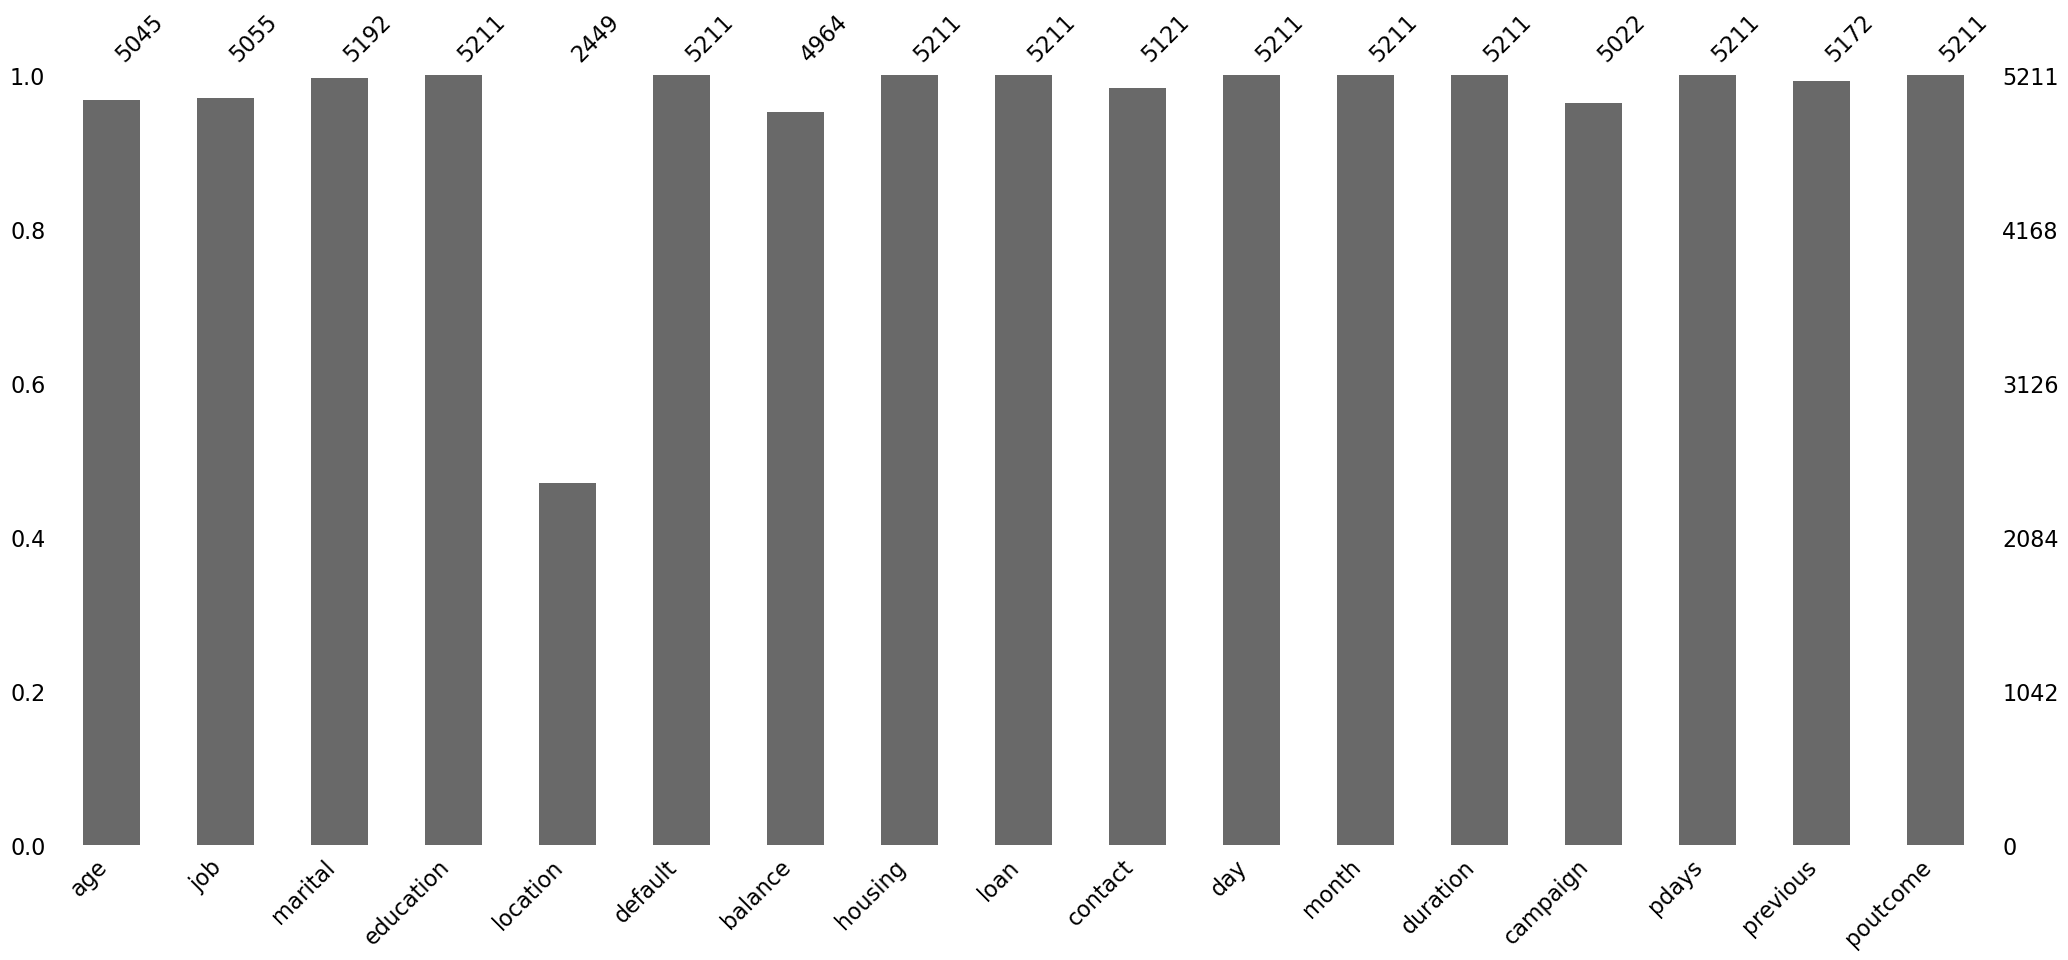

In [29]:
mno.bar(df_final)

In [30]:
df_final.drop(columns=["location"], inplace=True)

In [31]:
df_final

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,26.0,self-employed,single,tertiary,no,-101.0,no,yes,cellular,29,jan,172,1.0,-1,0.0,unknown
1,47.0,technician,married,secondary,no,1167.0,yes,no,cellular,2,feb,139,3.0,73,2.0,success
2,35.0,self-employed,married,tertiary,no,2427.0,no,no,cellular,12,jul,210,3.0,158,7.0,other
3,54.0,technician,divorced,secondary,no,NaN,no,no,cellular,30,jan,86,1.0,-1,0.0,unknown
4,27.0,blue-collar,single,secondary,no,-208.0,yes,no,unknown,21,may,127,2.0,-1,0.0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5206,38.0,administrator,married,secondary,no,1767.0,yes,no,cellular,12,nov,893,7.0,-1,0.0,unknown
5207,39.0,housemaid,married,primary,no,562.0,no,no,cellular,12,aug,234,2.0,-1,0.0,unknown
5208,46.0,technician,married,secondary,no,0.0,no,no,unknown,20,jun,625,1.0,-1,0.0,unknown
5209,NaN,technician,single,secondary,no,1195.0,yes,no,cellular,19,nov,187,6.0,188,9.0,failure


In [32]:
df_final["age"] = df_final["age"].fillna(np.int64(df_final["age"].mean()))
df_final["age"] = df_final["age"].astype(np.int64)
df_final["campaign"] = df_final["campaign"].fillna(np.int64(df_final["campaign"].mean()))
df_final["previous"] = df_final["previous"].fillna(np.int64(df_final["previous"].mean()))
df_final["campaign"] = df_final["campaign"].astype(np.int64)
df_final["previous"] = df_final["previous"].astype(np.int64)
for column in df_final.columns:
    if df_final[column].dtype != "object":
        if df_final[column].dtype == "int64":
            df_final[column] = df_final[column].fillna(np.int64(df_final[column].mean()))
        else:
            df_final[column] = df_final[column].fillna(df_final[column].mean())
    else:
        moda = df_final[column].mode()
        print(moda)
        df_final[column] = df_final[column].fillna(moda)

0    blue-collar
Name: job, dtype: object
0    married
Name: marital, dtype: object
0    secondary
Name: education, dtype: object
0    no
Name: default, dtype: object
0    yes
Name: housing, dtype: object
0    no
Name: loan, dtype: object
0    cellular
Name: contact, dtype: object
0    may
Name: month, dtype: object
0    unknown
Name: poutcome, dtype: object


In [33]:
df_final

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,26,self-employed,single,tertiary,no,-101.000000,no,yes,cellular,29,jan,172,1,-1,0,unknown
1,47,technician,married,secondary,no,1167.000000,yes,no,cellular,2,feb,139,3,73,2,success
2,35,self-employed,married,tertiary,no,2427.000000,no,no,cellular,12,jul,210,3,158,7,other
3,54,technician,divorced,secondary,no,1381.651088,no,no,cellular,30,jan,86,1,-1,0,unknown
4,27,blue-collar,single,secondary,no,-208.000000,yes,no,unknown,21,may,127,2,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5206,38,administrator,married,secondary,no,1767.000000,yes,no,cellular,12,nov,893,7,-1,0,unknown
5207,39,housemaid,married,primary,no,562.000000,no,no,cellular,12,aug,234,2,-1,0,unknown
5208,46,technician,married,secondary,no,0.000000,no,no,unknown,20,jun,625,1,-1,0,unknown
5209,41,technician,single,secondary,no,1195.000000,yes,no,cellular,19,nov,187,6,188,9,failure


In [34]:
for column in df_final.columns:
    print("coluna:", column)
    print(f"{df_final[column].unique()} -> {df_final[column].dtype}")
    print(f"{df_final[column].value_counts()}")

coluna: age
[ 26  47  35  54  27  40  41  48  33  37  61  45  32  46  43  31  34  53
  38  60  50  59  39  19  30  49  56  51  44  28  25  36  52  65  29  78
  58  42  57  23  55  24  73  80  62  67  82  71 150  70  63  74  64  66
  72  22  83  76  68  77  69  81  21  18  75   8  79  20  87  86] -> int64
age
41    317
31    237
32    231
35    219
33    216
     ... 
83      2
71      1
80      1
18      1
87      1
Name: count, Length: 70, dtype: int64
coluna: job
['self-employed' 'technician' 'blue-collar' 'services' 'management'
 'unemployed' 'administrator' 'entrepreneur' nan 'student' 'retired'
 'housemaid' 'unknown'] -> object
job
blue-collar      1091
management       1062
technician        828
administrator     557
services          476
retired           247
self-employed     183
entrepreneur      183
unemployed        159
housemaid         137
student            96
unknown            36
Name: count, dtype: int64
coluna: marital
['single' 'married' 'divorced' nan] -> object
mar

In [35]:
df_final.replace({pd.NA: "nope"}, inplace=True)
df_final.replace({"nope": pd.NA}, inplace=True)
for column in df_final.columns:
    df_final[column] = df_final[column].fillna(df_final[column].mode()[0])
    print(df_final[column].unique())
    

[ 26  47  35  54  27  40  41  48  33  37  61  45  32  46  43  31  34  53
  38  60  50  59  39  19  30  49  56  51  44  28  25  36  52  65  29  78
  58  42  57  23  55  24  73  80  62  67  82  71 150  70  63  74  64  66
  72  22  83  76  68  77  69  81  21  18  75   8  79  20  87  86]
['self-employed' 'technician' 'blue-collar' 'services' 'management'
 'unemployed' 'administrator' 'entrepreneur' 'student' 'retired'
 'housemaid' 'unknown']
['single' 'married' 'divorced']
['tertiary' 'secondary' 'primary' 'unknown']
['no' 'yes']
[-101. 1167. 2427. ... 3463. 3119. 1767.]
['no' 'yes']
['yes' 'no']
['cellular' 'unknown' 'telephone']
[29  2 12 30 21 14 20  6 23 13 28 17 25 26  7  9 18 16 11 24  4 19 22  8
 27  5  3  1 31 10 15]
['jan' 'feb' 'jul' 'may' 'jun' 'apr' 'sep' 'dec' 'nov' 'aug' 'oct' 'mar']
[  172   139   210    86   127   329    62  1423   173    23  1451  1038
    85    45    43   201   200    48   300   157    95    97   237   164
    55   317   306   641    67   203   165    35 

In [36]:
for column in df_final.columns:
    print("coluna:", column)
    print(f"{df_final[column].unique()} -> {df_final[column].dtype}")

coluna: age
[ 26  47  35  54  27  40  41  48  33  37  61  45  32  46  43  31  34  53
  38  60  50  59  39  19  30  49  56  51  44  28  25  36  52  65  29  78
  58  42  57  23  55  24  73  80  62  67  82  71 150  70  63  74  64  66
  72  22  83  76  68  77  69  81  21  18  75   8  79  20  87  86] -> int64
coluna: job
['self-employed' 'technician' 'blue-collar' 'services' 'management'
 'unemployed' 'administrator' 'entrepreneur' 'student' 'retired'
 'housemaid' 'unknown'] -> object
coluna: marital
['single' 'married' 'divorced'] -> object
coluna: education
['tertiary' 'secondary' 'primary' 'unknown'] -> object
coluna: default
['no' 'yes'] -> object
coluna: balance
[-101. 1167. 2427. ... 3463. 3119. 1767.] -> float64
coluna: housing
['no' 'yes'] -> object
coluna: loan
['yes' 'no'] -> object
coluna: contact
['cellular' 'unknown' 'telephone'] -> object
coluna: day
[29  2 12 30 21 14 20  6 23 13 28 17 25 26  7  9 18 16 11 24  4 19 22  8
 27  5  3  1 31 10 15] -> int64
coluna: month
['jan' 'f

<Axes: >

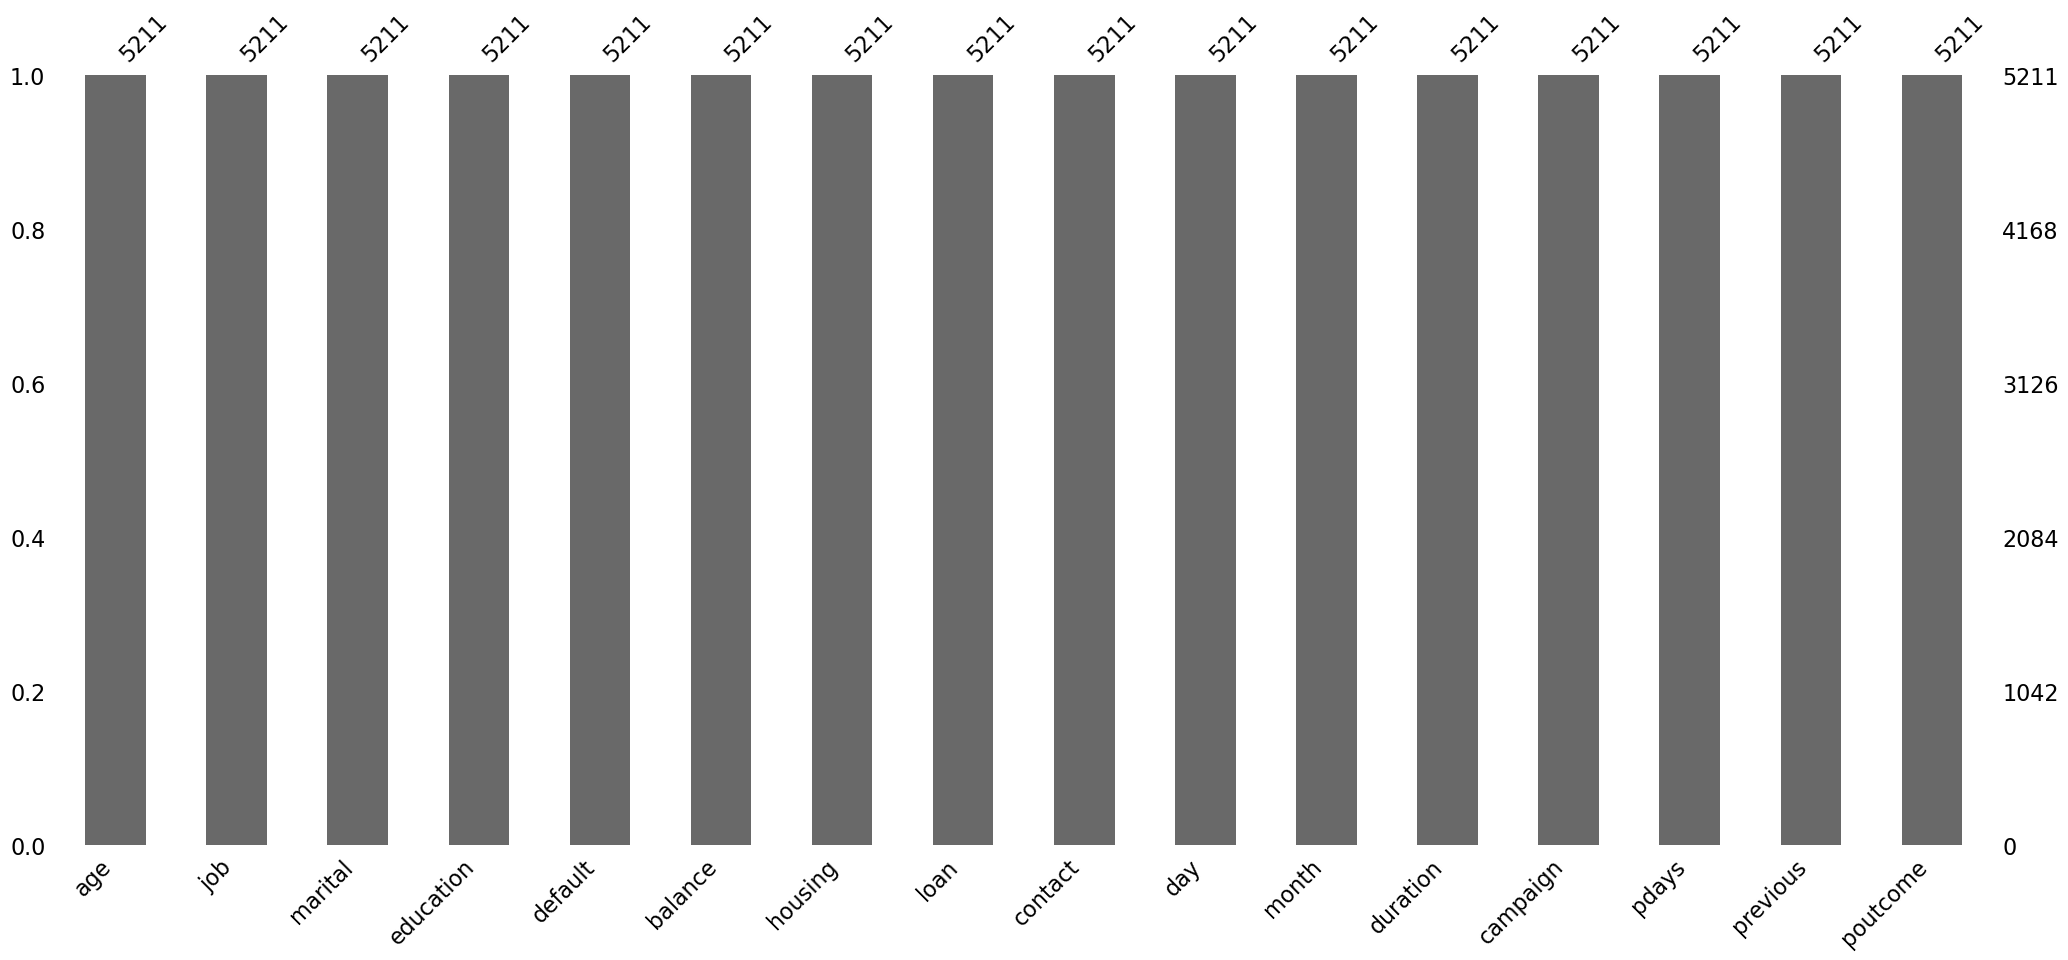

In [37]:
mno.bar(df_final)

In [38]:
for column in df_final.columns:
    if df_final[column].dtype == "object":
        le = LabelEncoder()
        le.fit(df_final[column].unique())
        df_final[column] = le.transform(df_final[column])
        print(df_final[column].unique(), set(le.inverse_transform((df_final[column]))))
    print(df_final[column].unique(), df_final[column].dtype)
df_final.to_csv("data_treated_final.csv", index=False)

[ 26  47  35  54  27  40  41  48  33  37  61  45  32  46  43  31  34  53
  38  60  50  59  39  19  30  49  56  51  44  28  25  36  52  65  29  78
  58  42  57  23  55  24  73  80  62  67  82  71 150  70  63  74  64  66
  72  22  83  76  68  77  69  81  21  18  75   8  79  20  87  86] int64
[ 6  9  1  7  4 10  0  2  8  5  3 11] {'unknown', 'housemaid', 'administrator', 'blue-collar', 'management', 'services', 'unemployed', 'retired', 'self-employed', 'entrepreneur', 'technician', 'student'}
[ 6  9  1  7  4 10  0  2  8  5  3 11] int64
[2 1 0] {'single', 'married', 'divorced'}
[2 1 0] int64
[2 1 0 3] {'secondary', 'unknown', 'primary', 'tertiary'}
[2 1 0 3] int64
[0 1] {'no', 'yes'}
[0 1] int64
[-101. 1167. 2427. ... 3463. 3119. 1767.] float64
[0 1] {'no', 'yes'}
[0 1] int64
[1 0] {'no', 'yes'}
[1 0] int64
[0 2 1] {'unknown', 'telephone', 'cellular'}
[0 2 1] int64
[29  2 12 30 21 14 20  6 23 13 28 17 25 26  7  9 18 16 11 24  4 19 22  8
 27  5  3  1 31 10 15] int64
[ 4  3  5  8  6  0 11  2

In [ ]:
y_pred_models_final = {"Random Forest": [], "Extra Trees": [], "Decision Tree": []}
for model in models:
    for i in range(len(models[model])):
        y_pred_models_final[model].append(models[model][i].predict(df_final))


In [ ]:
dfs = []
for model in y_pred_models_final:
    for y_pred in y_pred_models_final[model]:
        dfs.append(pd.DataFrame({"id": ids, "y": y_pred}))

In [ ]:
dfs

In [ ]:
for i in range(len(dfs)):
    dfs[i].to_csv(f"targets-csv/prediction_{i}_2-0.csv", index=False)